In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import statsmodels
import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import mse,rmse
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
from torch.utils.data import DataLoader
from torch.nn import Linear
from torch.nn import Linear
from torch.nn import ReLU
from numpy import vstack
from torch.nn import Module
from torch.optim import Adam,SGD
from torch.nn import MSELoss
from torch.nn.init import xavier_uniform_
from torch.utils.data import Dataset
from itertools import product
torch.set_printoptions(linewidth=120)
df = pd.read_csv('artificial_1.csv' ,parse_dates=["date"])
print(torch.__version__)

#df.to_string()
print(df.head())


In [660]:
def evaluatereg(actual,prediction):
    
    return  (mse(actual, prediction), rmse(actual, prediction),r2_score(actual,prediction),np.mean(np.abs((prediction - actual) /np.abs(actual))) * 100) 

In [661]:
from pandas import concat
temps = DataFrame(df.value)
len(temps)
width = 3
window4 = temps.shift(2).expanding()
shifted = temps.shift(width - 1)
window = shifted.rolling(window=width)
dataframe = concat([window.min(), window.mean(), window.max()], axis=1)
dataframe.columns = [ 'min_value', 'mean_value', 'max_value']
temps = DataFrame(df.value)


dates = pd.to_datetime(df.date)
test_df = df.copy()
test_df["year"] = dates.dt.year
test_df["month"] = dates.dt.month
test_df["day"] = dates.dt.day


dataframe3= pd.concat([test_df["year"], test_df["month"],test_df["day"], dataframe.min_value, dataframe.mean_value, dataframe.max_value, window4.min(), window4.mean(), window4.max(), temps.shift(1), temps.shift(2), temps.shift(3),temps.shift(7),temps.shift(8)],axis=1)

dataframe3.columns = [ 'year', 'month', 'day','min_rolling','mean_rolling',  'max_rolling','min_expanding', 'mean_expanding', 'max_expanding','t-1','t-2','t-3','t-7','t-8']

dataframeee=[df,dataframe3]

dataframe2= pd.concat(dataframeee, "columns").dropna()

print(dataframe2)
#seasons
seasonsdataframe=DataFrame()
l=[]
for i in test_df.month.values:
    if i== 6 or 7 or 8:
        l.append('2')
    if i == 3 or 4 or 5:
        l.append('1')
    if i== 9 or 10 or 11:
        l.append('3')
    if i== 12 or 1 or 2:
        l.append('4')
seasonsdataframe = pd.DataFrame(l)
seasonsdataframe.columns= ['seasons']
dataframe2["seasons"]=seasonsdataframe.seasons
dataframe2['sin_month'] = np.sin((dataframe2.month-1)*(2.*np.pi/12))
dataframe2['cos_month'] = np.cos((dataframe2.month-1)*(2.*np.pi/12))

          date      value  temperature  year  month  day  min_rolling  \
8   2018-01-09  45.319039          4.0  2018      1    9    63.698461   
9   2018-01-10  44.750630          5.0  2018      1   10    39.238793   
10  2018-01-11  46.462108          7.0  2018      1   11    39.238793   
11  2018-01-12  42.939859          9.0  2018      1   12    39.238793   
12  2018-01-13  44.677583         10.0  2018      1   13    44.750630   
..         ...        ...          ...   ...    ...  ...          ...   
725 2019-12-27  45.282996          6.0  2019     12   27    40.947501   
726 2019-12-28  45.108031          5.0  2019     12   28    43.729539   
727 2019-12-29  45.029418          5.0  2019     12   29    43.729539   
728 2019-12-30  70.865207          5.0  2019     12   30    43.729539   
729 2019-12-31  67.049218          8.0  2019     12   31    45.029418   

     mean_rolling  max_rolling  min_expanding  mean_expanding  max_expanding  \
8       66.102894    67.744812      63.6984

In [662]:
dataf = df.value.copy()
shifted6 = dataf.shift(6)
window7 = shifted6.rolling(7).mean()
shifted7 = dataf.shift(7)
window8= shifted7.rolling(8).mean()
shifted4 = dataf.shift(4)
window5 = shifted4.rolling(5).mean()
shifted3 = dataf.shift(3)
window4= shifted3.rolling(4).mean()
shifted1 = dataf.shift(1)
window2= shifted1.rolling(2).mean()
#shifted8 = dataf.shift(8)
#window9= shifted7.rolling(9).mean()
window7.dropna()
window8.dropna()
window4.dropna()
window5.dropna()
window2.dropna()
#window9.dropna()

dataframe2["rolling7"] = window7
dataframe2["rolling8"] =window8
dataframe2["rolling4"] =window4
dataframe2["rolling5"] =window5
dataframe2["rolling2"] =window2
#dataframe2["rolling9"] =window9
dataframe2 = dataframe2.dropna()

In [574]:
dataframe2copy=dataframe2.copy()
train=dataframe2copy[:-60].drop(columns = "date")
test=dataframe2copy[-60:].drop(columns = "date")
x_train=train.drop(labels=["value"],axis=1)
y_train=train["value"]
x_test=test.drop(labels=["value"],axis=1)
y_test=test["value"]



In [575]:
torch.tensor(y_test.values)

tensor([43.1047, 45.0897, 71.4103, 56.8599, 55.1013, 56.3197, 56.3182, 55.9808, 56.1500, 30.4635, 35.3979, 34.0040,
        33.8041, 47.5060, 46.9198, 43.6083, 71.4502, 66.6274, 66.7513, 66.1404, 65.0731, 65.8176, 65.5089, 30.1344,
        44.7316, 44.8683, 46.0186, 46.2306, 43.8189, 44.5401, 70.2092, 67.2237, 65.9406, 67.4490, 65.5224, 66.0260,
        64.6513, 41.3025, 44.6374, 43.5148, 44.4075, 42.6951, 44.9682, 45.1125, 71.2881, 67.4981, 65.6990, 66.8075,
        66.3122, 65.8067, 63.9232, 40.9475, 44.4960, 45.0180, 43.7295, 45.2830, 45.1080, 45.0294, 70.8652, 67.0492],
       dtype=torch.float64)

In [576]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
X_train_norm = norm.transform(x_train)

# transform testing dataabs
X_test_norm = norm.transform(x_test)

In [577]:
class Energycsv(Dataset):
    def __init__(self,df):
        self.df = df
        self.X = df.values[:, 2:].astype('float32')
        self.y = df.values[:, 1].astype('float32')
        self.y = self.y.reshape((len(self.y), 1))
        
    def __len__(self):
        return len(self.X)
 
    # get a row at an index
    def __getitem__(self, i):
        return torch.tensor(self.X[i]), torch.tensor(self.y[i])

In [640]:
class MLP(Module):
    def __init__(self,n_inputs):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = Linear(n_inputs, 10)
        xavier_uniform_(self.hidden1.weight)
        self.act1 = ReLU()
        self.hidden3 = Linear(10, 1)
        xavier_uniform_(self.hidden3.weight)
    def forward(self, X):
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.hidden3(X)
        return X
       
def prepare_data(train, test,batch_size,shuffle):
        train_dl = DataLoader(train, batch_size=batch_size, shuffle=shuffle)
        test_dl = DataLoader(test, batch_size=batch_size, shuffle=shuffle)
        return train_dl, test_dl
def train_model(train_dl, model, learning_rate,epochs):
        errorlist = []
        criterion = MSELoss()
        optimizer = Adam(model.parameters(), lr=learning_rate)
        for epoch in range(epochs):
            for i, (inputs,targets) in enumerate(train_dl):
                # clear the gradients
                optimizer.zero_grad()
                # compute the model output
                yhat = model(inputs)
                # calculate loss
                loss = criterion(yhat, targets)
                # credit assignment
                loss.backward()
                # update model weights
                optimizer.step()
            if epoch %10 ==0:
                errorlist.append(evaluate_model(test_dl, model))
        return errorlist
def evaluate_model(test_dl,  model):
        preds, actuals = list(), list()
        errorlist = []
        for k, (inputs, targets) in enumerate(test_dl):
            yhat = model(inputs)
            yhat = yhat.detach().numpy()
            actual = targets.numpy()
            actual = actual.reshape(len(actual),1)
            preds.append(yhat)
            actuals.append(actual)
        preds, actuals = vstack(preds), vstack(actuals)
        mean_sqrt_error = mse(actuals, preds)
        R2 = r2_score(actuals, preds)
        return mean_sqrt_error
def predict(ytest,model):
        ytest=torch.tensor(np.array(ytest).astype('float32'))
        
        yhat= model(ytest)
        yhat = yhat.detach().numpy()
        return yhat

In [ ]:
train = Energycsv(dataframe2.iloc[:-60])
test = Energycsv(dataframe2.iloc[-60:])
parameters = dict(
                lr = [0.0001, 0.001, 0.01],
                epoch_size = [100, 200],
                shuffle = [True,False],
                batch_size = [1,10,100]
)
param_values = [v for v in parameters.values()] 
error_of_choice= []
whole_turns = []
for lr,epoch_size, shuffle, batch_size in product(*param_values):

    #print('learning rate: %.3f, epoch: %.3f, shuffle: %.3f,batch_size: %.3' % (lr,epoch_size,shuffle,batch_size))
    train_dl, test_dl = prepare_data(train,test,batch_size,shuffle)
    #print(len(train_dl.dataset), len(test_dl.dataset))
    model = MLP(23)

    # train the model
    errorrrr  = train_model(train_dl, model,lr,epoch_size)

    # evaluate the model 
    MSE = evaluate_model(test_dl, model)
    error_of_choice.append(MSE)
    whole_turns.append([lr,epoch_size, shuffle, batch_size,MSE]) 
    print('learning rate: %.3f, epoch: %.3f, shuffle: %.3f,batch_size: %.3f, MSE:%.3f' % 
          (lr,epoch_size,shuffle,batch_size,MSE))

learning rate: 0.000, epoch: 100.000, shuffle: 1.000,batch_size: 1.000, MSE:17.989
learning rate: 0.000, epoch: 100.000, shuffle: 1.000,batch_size: 10.000, MSE:248.978
learning rate: 0.000, epoch: 100.000, shuffle: 1.000,batch_size: 100.000, MSE:170.797
learning rate: 0.000, epoch: 100.000, shuffle: 0.000,batch_size: 1.000, MSE:37.690
learning rate: 0.000, epoch: 100.000, shuffle: 0.000,batch_size: 10.000, MSE:113.376
learning rate: 0.000, epoch: 100.000, shuffle: 0.000,batch_size: 100.000, MSE:228.605
learning rate: 0.000, epoch: 200.000, shuffle: 1.000,batch_size: 1.000, MSE:12.877
learning rate: 0.000, epoch: 200.000, shuffle: 1.000,batch_size: 10.000, MSE:50.680
learning rate: 0.000, epoch: 200.000, shuffle: 1.000,batch_size: 100.000, MSE:373.270
learning rate: 0.000, epoch: 200.000, shuffle: 0.000,batch_size: 1.000, MSE:28.748
learning rate: 0.000, epoch: 200.000, shuffle: 0.000,batch_size: 10.000, MSE:74.631
learning rate: 0.000, epoch: 200.000, shuffle: 0.000,batch_size: 100.000

In [642]:
#print(error_of_choice)
min_error_index =error_of_choice.index(min(error_of_choice))
choice = whole_turns[min_error_index]
print('Best parametres for the network:','learning rate:',choice[0],'epoch:',choice[1], 'shuffle:',choice[2],'batch_size:',choice[3], 'MSE:', choice[4])          
#print('MSE: %.3f, RMSE: %.3f' % (MSE, np.sqrt(MSE)))


Best paramteres for the network: learning rate: 0.0001 epoch: 200 shuffle: True batch_size: 1 MSE: [12.8774]


In [648]:

train_dl, test_dl = prepare_data(train,test,1,True)
#print(len(train_dl.dataset), len(test_dl.dataset))
model = MLP(23)
errorrrr  = train_model(train_dl, model,0.0001,200)
# make prediction for 60 rows
prediction_y = predict(x_test, model)

In [656]:
#print(prediction_y)
r2_score(y_test, prediction_y)
print('MSE: %.3f, RMSE: %.3f, R2 score: %.3f, MAPE: %.3f' %evaluatereg(np.array(y_test).reshape(-1,1), prediction_y))

MSE: 14.100, RMSE: 3.755, R2 score: 0.904, MAPE: 6.025


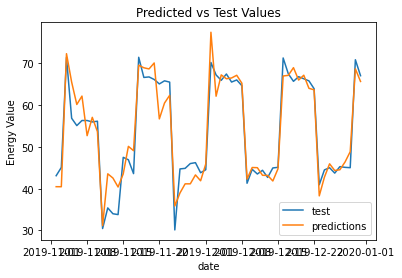

In [657]:
plt.title('Predicted vs Test Values')
plt.xlabel('date')
plt.ylabel('Energy Value')
plt.plot(dataframe2.date.iloc[-60:],y_test)
plt.plot(dataframe2.date.iloc[-60:],prediction_y)
plt.legend(["test","predictions"])

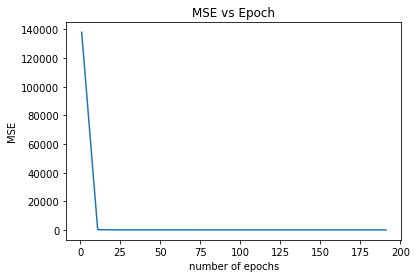

In [658]:
plt.title('MSE vs Epoch')
plt.xlabel('number of epochs')
plt.ylabel('MSE')

plt.plot(np.arange(1,200,10),errorrrr)